# Breast Cancer Diagnosis Prediction
### Group - Number: 3
### Team Members:
- Yen Nga Le - 0824817
- Tehsin Shaikh - 0831234
- Srilakshmi Gummadidala - 0803509

# 1. Load libraries

In [1]:
#pip install rfpimp

In [2]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rfpimp import *

# 2. Load Data

In [3]:
# load dataset
df = pd.read_csv('breast-cancer_Healthcare .csv')
df.head()


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# 3. Exploratory Data Analysis

## 3.1 Understand Column Labels

- **Sample code number:** id number
- **Clump Thickness:** 1 - 10: -> Benign cells tend to be grouped in monolayers, while cancerous cells are often grouped in multilayers.
- **Uniformity of Cell Size:** 1 - 10: -> Cancer cells tend to vary in size and shape.
- **Uniformity of Cell Shape:** 1 - 10: -> Cancer cells tend to vary in shape and size.
- **Marginal Adhesion:** 1 - 10: -> Normal cells tend to stick together, while cancer cells tend to lose this ability, so the loss of adhesion is a sign of malignancy.
- **Single Epithelial Cell Size:** 1 - 10 -> It is related to the uniformity mentioned above. Epithelial cells that are significantly enlarged may be malignant.
- **Bare Nuclei:** 1 - 10 -> This term is used for nuclei not surrounded by cytoplasm (the rest of the cell). Those are typically seen in benign tumors.
- **Bland Chromatin:** 1 - 10 -> Describes a uniform “texture” of the nucleus seen in benign cells. In cancer cells, the chromatin tends to be more coarse and to form clumps.
- **Normal Nucleoli:** 1 - 10 -> Nucleoli are small structures seen in the nucleus. In normal cells, the nucleolus is usually very small, if visible. The nucleoli become more prominent in cancer cells, and sometimes there are multiple.
- **Mitoses:** 1 - 10 ->  Cancer is essentially a disease of uncontrolled mitosis.
- **Class:** 2 or 4 -> (2 for benign - (non-cancerous), 4 for malignant - (cancerous)) lump in a breast.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


## 3.2 Handle Missing Values

In [5]:
# replace missing values to NA
df.replace("?", pd.NA, inplace=True)

In [6]:
# find null values
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# Verify the changes
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## 3.3 Data type convertion

In [9]:
# Convert "Bare Nuclei" column to int64
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')
# Verify the data types after conversion
print(df.dtypes)

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


In [10]:
# Replace spaces in column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Print data types after removing spaces from column names
print(df.dtypes)

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


In [11]:
# Replace spaces in column names with underscores
df.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)

# Print data types after replacing spaces with underscores in column names
print(df.dtypes)

Sample_code_number             int64
Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


In [12]:
# Checking unique values
df.nunique()

Sample_code_number             630
Clump_Thickness                 10
Uniformity_of_Cell_Size         10
Uniformity_of_Cell_Shape        10
Marginal_Adhesion               10
Single_Epithelial_Cell_Size     10
Bare_Nuclei                     10
Bland_Chromatin                 10
Normal_Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

In [13]:
#Check for duplicates
duplicates = df.duplicated()
count_duplicates = duplicates.sum()

print(duplicates)
print("Number of duplicate rows:", count_duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695    False
696    False
697    False
698    False
Length: 683, dtype: bool
Number of duplicate rows: 8


In [14]:
# Filter the DataFrame to show duplicate rows
duplicate_rows = df[duplicates]

# Display the duplicate records
duplicate_rows

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


## 3.4 Statistical Analysis

In [15]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",df.nunique())

Rows     :  683
Columns  :  11

Features : 
 ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

Unique values :  
 Sample_code_number             630
Clump_Thickness                 10
Uniformity_of_Cell_Size         10
Uniformity_of_Cell_Shape        10
Marginal_Adhesion               10
Single_Epithelial_Cell_Size     10
Bare_Nuclei                     10
Bland_Chromatin                 10
Normal_Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64


In [16]:
df.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## 3.5 Column Level Analysis

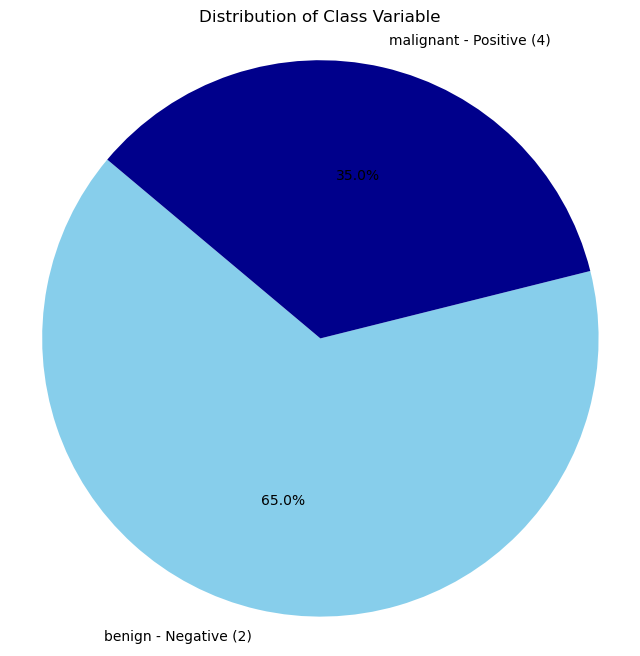

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['Class'].value_counts()

# Define labels for the pie chart
labels = ['benign - Negative (2)','malignant - Positive (4)']

# Plot the distribution of the 'Class' variable using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'darkblue'])
plt.title('Distribution of Class Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

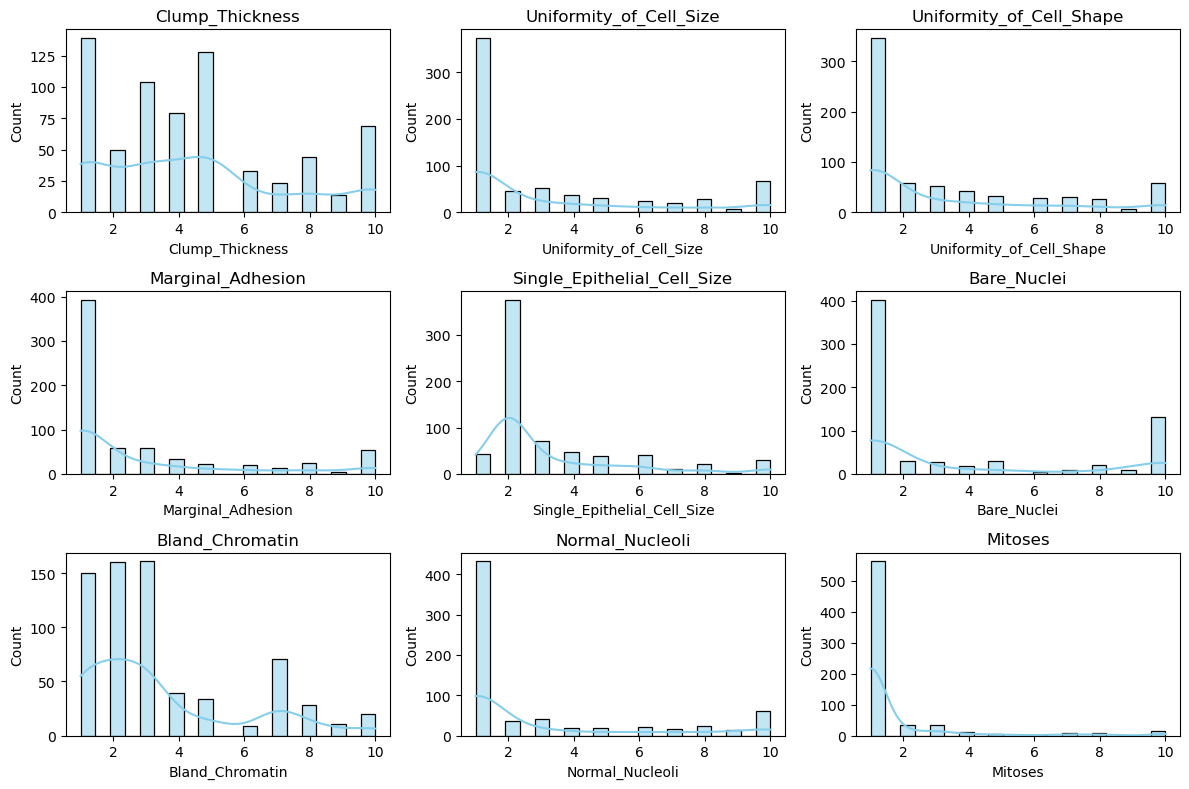

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Sample code number' column
df.drop(columns=['Sample_code_number'], inplace=True)

# List of numerical columns excluding 'Class'
numerical_columns = df.columns[df.columns != 'Class']

# Plot histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()

## Identifying outliers and the spread of the data

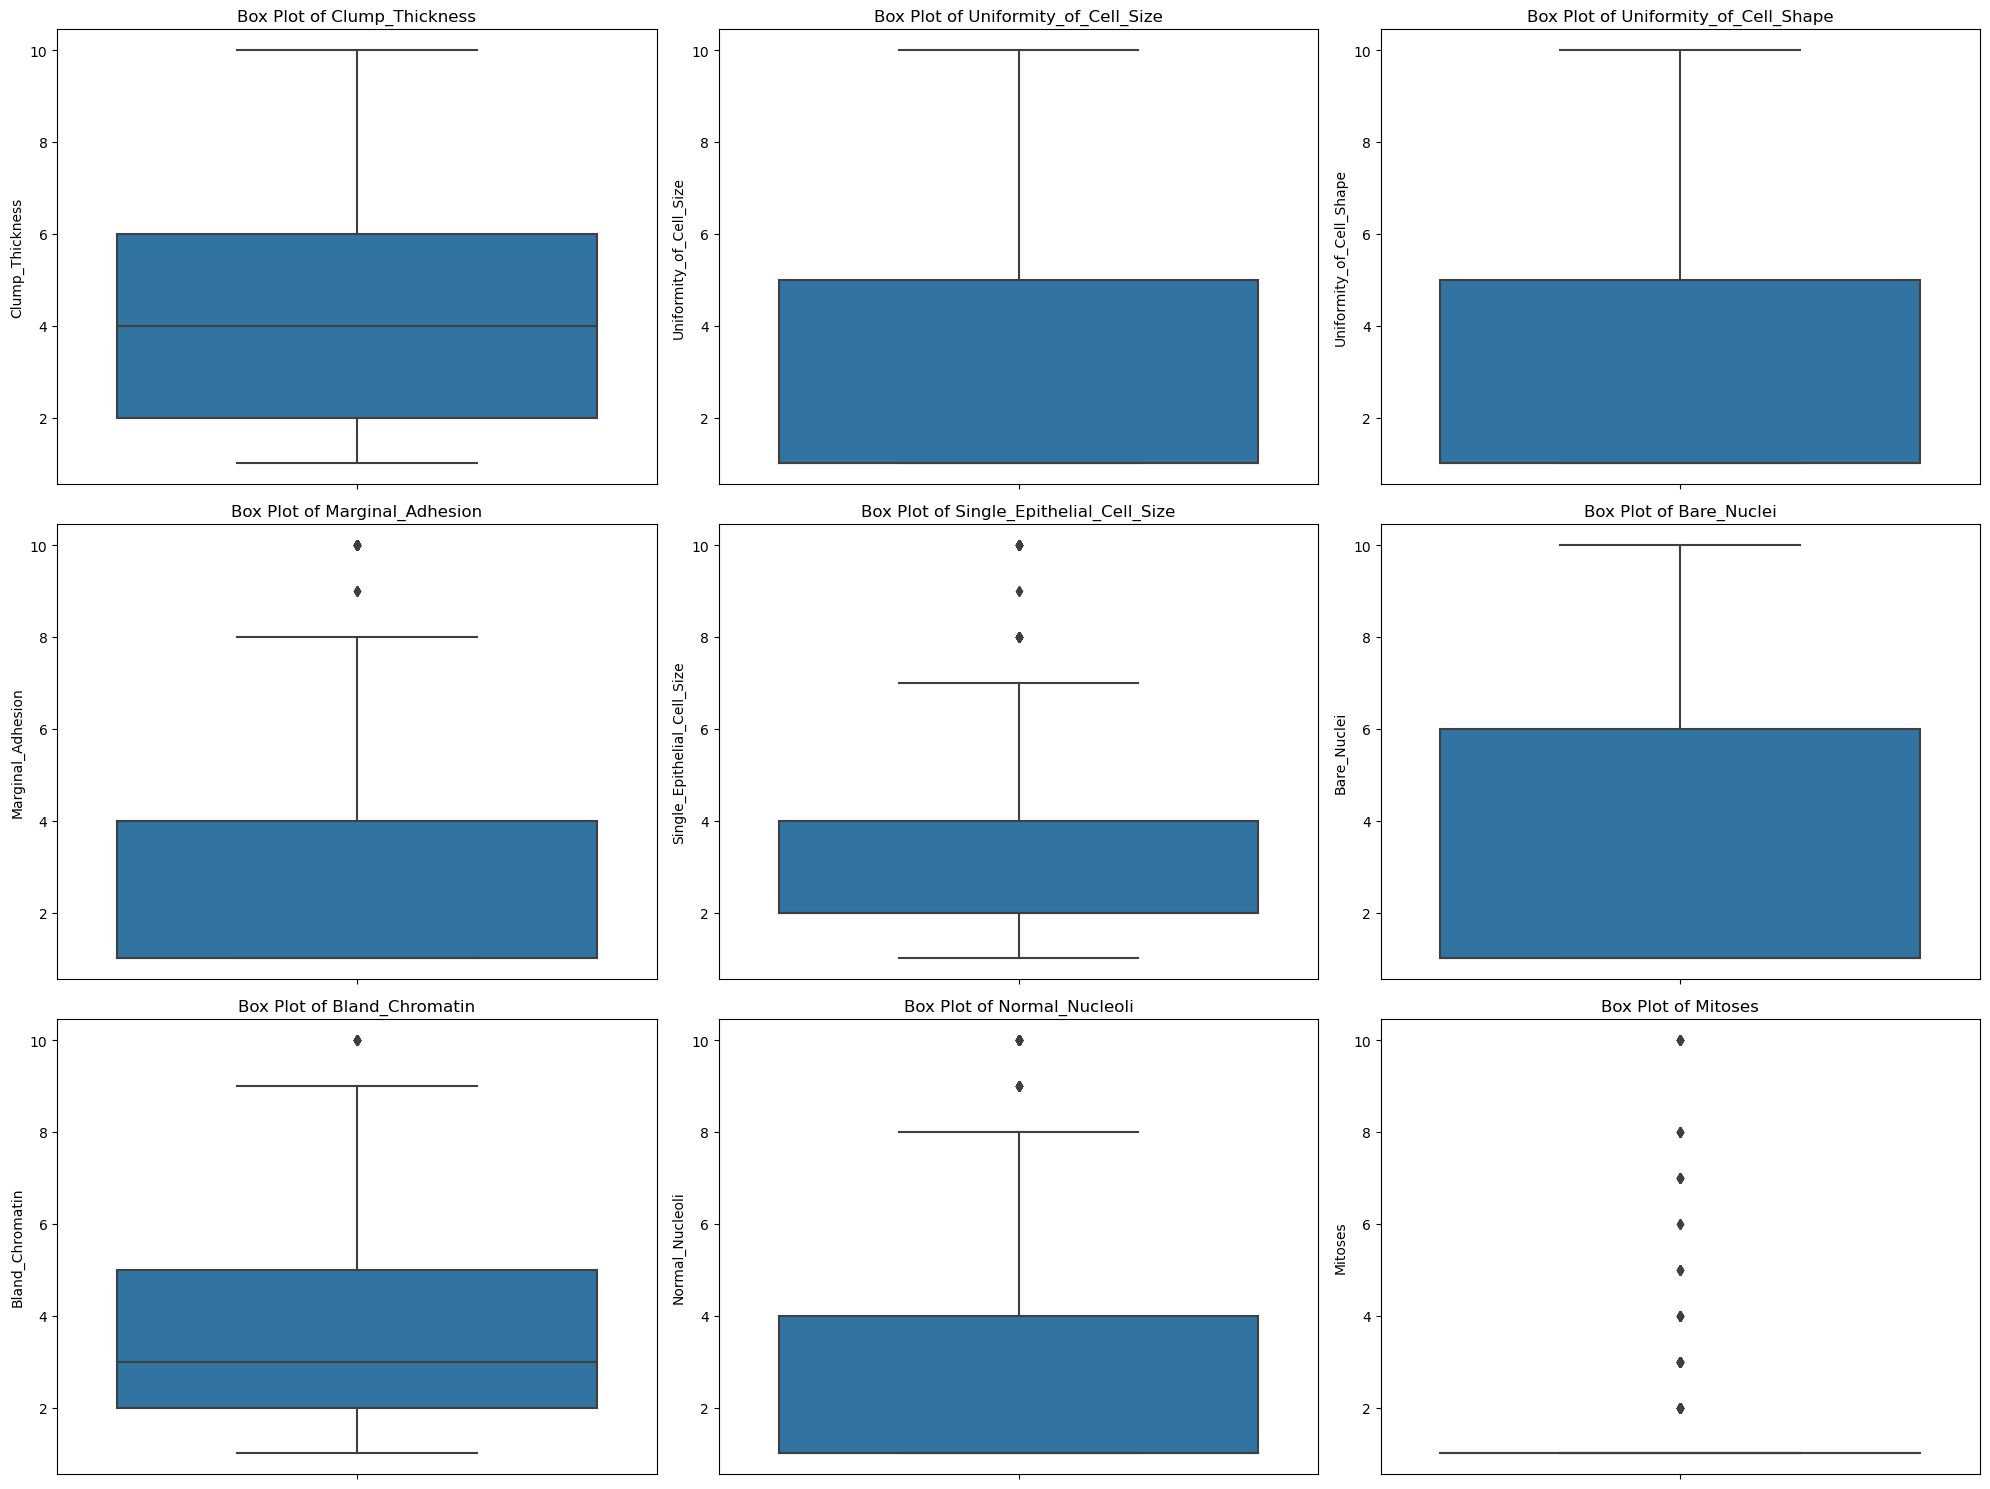

In [19]:
# Define the number of rows and columns for subplots
rows = 3
cols = 3

plt.figure(figsize=(20, 15))
for i, column in enumerate(df.drop(['Class'], axis=1).columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

## 3.6 Correlation analysis

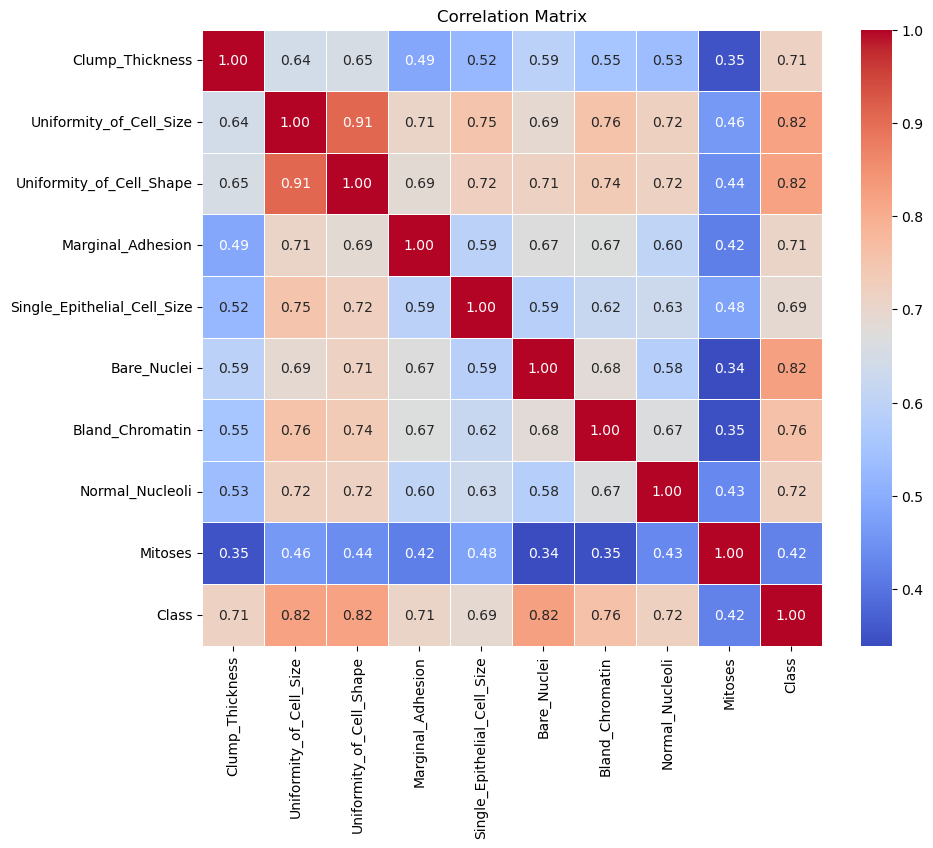

In [20]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 4. Model Prediction

## RF Classifier

In [21]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_Thickness              683 non-null    int64
 1   Uniformity_of_Cell_Size      683 non-null    int64
 2   Uniformity_of_Cell_Shape     683 non-null    int64
 3   Marginal_Adhesion            683 non-null    int64
 4   Single_Epithelial_Cell_Size  683 non-null    int64
 5   Bare_Nuclei                  683 non-null    int64
 6   Bland_Chromatin              683 non-null    int64
 7   Normal_Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset into training and testing sets
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.948905109489051
              precision    recall  f1-score   support

           2       0.93      0.99      0.96        79
           4       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



## Feature Importance

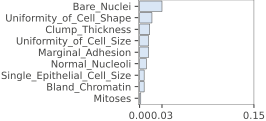

In [23]:
# check the feature importance from the model
rf_classifier.fit(X, y)
I = importances(rf_classifier, X, y)
plot_importances(I)

## Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid compatible with the 'lbfgs' solver
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']  # Compatible penalties with 'lbfgs' solver
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(solver='lbfgs'), param_grid=param_grid, cv=5)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Classification Report for Best Model:
              precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



## Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9343065693430657
              precision    recall  f1-score   support

           2       0.92      0.97      0.94        79
           4       0.96      0.88      0.92        58

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.94      0.93      0.93       137



## Neural Networks

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode target variable for multi-class classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.25)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Decode predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Classification report
print(classification_report(y_test, y_pred))

Epoch 1/10
13/13 [==============================] - 1s 25ms/step - loss: 1.0688 - accuracy: 0.4108 - val_loss: 0.7068 - val_accuracy: 0.3796
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.7182 - accuracy: 0.5844 - val_loss: 0.5126 - val_accuracy: 0.5839
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6119 - accuracy: 0.7115 - val_loss: 0.4403 - val_accuracy: 0.8540
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5337 - accuracy: 0.7873 - val_loss: 0.4073 - val_accuracy: 0.8613
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.7922 - val_loss: 0.3491 - val_accuracy: 0.8686
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4448 - accuracy: 0.8386 - val_loss: 0.3210 - val_accuracy: 0.8686
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3786 - accuracy: 0.8753 - val_loss: 0.2904 - val_accuracy: 0.8905
Epoch 8/10
13/13 [=

## Classifier Model Techiques after Feature Importnaces:

In [28]:
import logging
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Set logging level to suppress info and warning messages from LightGBM
logging.getLogger('lightgbm').setLevel(logging.ERROR)

# Split the data into features (X) and target variable (y)
X = df[['Bare_Nuclei', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Clump_Thickness',
        'Uniformity_of_Cell_Size', 'Normal_Nucleoli', 'Single_Epithelial_Cell_Size',
        'Bland_Chromatin']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier including all models
clf = LazyClassifier(predictions=True)

# Fit and predict using LazyClassifier
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance report
print(models)

100%|██████████| 29/29 [00:01<00:00, 27.67it/s]

[LightGBM] [Info] Number of positive: 181, number of negative: 365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 546, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331502 -> initscore=-0.701400
[LightGBM] [Info] Start training from score -0.701400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

## Advanced Modeling - Neural Networks after Feature Selection

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode target variable for multi-class classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.25)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Decode predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Classification report
print(classification_report(y_test, y_pred))

Epoch 1/10
13/13 [==============================] - 1s 22ms/step - loss: 0.8029 - accuracy: 0.5672 - val_loss: 0.5861 - val_accuracy: 0.7956
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.6822 - val_loss: 0.5153 - val_accuracy: 0.8467
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5764 - accuracy: 0.7311 - val_loss: 0.4435 - val_accuracy: 0.8613
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4989 - accuracy: 0.7775 - val_loss: 0.4190 - val_accuracy: 0.8832
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.4469 - accuracy: 0.8240 - val_loss: 0.3978 - val_accuracy: 0.8905
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4024 - accuracy: 0.8411 - val_loss: 0.3750 - val_accuracy: 0.8905
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3991 - accuracy: 0.8753 - val_loss: 0.3558 - val_accuracy: 0.9124
Epoch 8/10
13/13 [=